# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Fadhly Rafiansyah
- **Email:** rafiabang@gmail.com
- **ID Dicoding:** fadhlyrafi

## Menentukan Pertanyaan Bisnis

1. Bagaimana Peningkatan Jumlah Pelanggan Setiap Bulan Dalam 2 Tahun?
2. Apakah Pergantian Musim Memengaruhi Jumlah Pelanggan?
3. Pada Jam Berapakah Terjadi Lonjakan Jumlah Pelanggan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Import data dari day.csv kemudian di assign ke variabel day_df
- Import data dari hour.csv kemudian di assign ke variabel hour_df

### Assessing Data

In [4]:
# Menilai tabel day
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe(include="all")

# Menilai tabel hour
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Pada tabel day, tipe data dteday masih object: ubah jadi datetime
- Pada tabel hour, tipe data dteday masih object: ubah jadi datetime

### Cleaning Data

In [5]:
# Memperbaiki datetime di tabel day
day_column = ["dteday"]
for column in day_column:
    day_df[column] = pd.to_datetime(day_df[column])
day_df.info()
# Memperbaiki datetime di tabel hour
hour_column = ["dteday"]
for column in hour_column:
    hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data dtetime pada tabel day sudah diperbaiki
- Tipe data dtetime pada tabel day sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore Tabel Day dan Hour

In [6]:
# Analisis data tabel day
# Banyak pelanggan tiap bulan dalam 2 tahun
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.strftime('%B')  # Menyimpan nama bulan
day_df['year'] = day_df['dteday'].dt.year  # Menyimpan tahun
day_df['month_num'] = day_df['dteday'].dt.month  # Menyimpan angka bulan
monthly_bikes_df = day_df.groupby(['year', 'month_num', 'month']).agg({
    "cnt": "sum"
}).reset_index()
monthly_bikes_df.sort_values(by=['year', 'month_num'], inplace=True)
print(monthly_bikes_df[['year', 'month', 'cnt']])
# Banyak pelanggan berdasarkan musim
print(day_df.groupby(by="season").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Banyak planggan berdasarkan cuaca
print(day_df.groupby(by="weathersit").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Banyak pelanggan berdasarkan hari
print(day_df.groupby(by="weekday").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Banyak pelanggan berdasarkan bulan
print(day_df.groupby(by="mnth").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Banyak pelanggan berdasarkan holiday
print(day_df.groupby(by="holiday").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Jumlah pelanggan yang melakukan rgistrasi setiap bulannya
print(day_df.groupby(by="mnth").agg({"registered": "sum"}))
# # Tipe pelanggan, perbandingan casual dan rgistred
# print(day_df.groupby(by="yr").agg({"registered": "sum", "casual": "sum"}))

# Analisis data tabel hour
hour_df["time_segments"] = hour_df.hr.apply(lambda x: "morning" if x >= 6 and x < 12 else ("afternoon" if x >= 12 and x < 18 else ("night" if x >= 18 and x < 24 else "dawn")))
# Banyak pelanggan berdasarkan time segments
print(hour_df.groupby(by="time_segments").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False))
# Pola Penggunaan Sepeda Berdasarkan Musim
print(hour_df.groupby(by=["season", "time_segments"]).agg({"cnt": "sum"}))

    year      month     cnt
0   2011    January   38189
1   2011   February   48215
2   2011      March   64045
3   2011      April   94870
4   2011        May  135821
5   2011       June  143512
6   2011       July  141341
7   2011     August  136691
8   2011  September  127418
9   2011    October  123511
10  2011   November  102167
11  2011   December   87323
12  2012    January   96744
13  2012   February  103137
14  2012      March  164875
15  2012      April  174224
16  2012        May  195865
17  2012       June  202830
18  2012       July  203607
19  2012     August  214503
20  2012  September  218573
21  2012    October  198841
22  2012   November  152664
23  2012   December  123713
            cnt
season         
3       1061129
2        918589
4        841613
1        471348
                cnt
weathersit         
1           2257952
2            996858
3             37869
            cnt
weekday        
5        487790
4        485395
6        477807
3        473048
2       

**Insight:**
- Melihat tren perkembangan banyak pelanggan dari 2011 hingga 2012
- Banyak pelanggan berdasarkan musim
- Banyak pelanggan beerdasarkan cuaca
- Banyak Pelanggan Berdasarkan Hari
- Banyak Pelanggan Berdasarkan Bulan dan Hari Libur
- Jumlah Pelanggan yang Melakukan Registrasi Setiap Bulannya
- Banyak Pelanggan Berdasarkan Segmen Waktu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Pelanggan Per Bulan Dalam 2 Tahun?

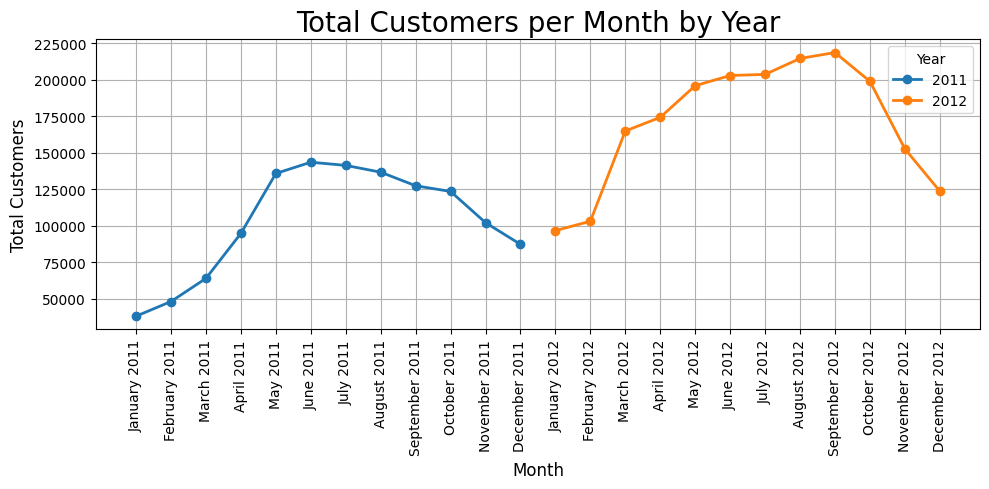

In [7]:
# Q1: Bagaimana Performa Pelanggan Per Bulan Dalam 2 Tahun?
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.strftime('%B')  # Menyimpan nama bulan
day_df['year'] = day_df['dteday'].dt.year  # Menyimpan tahun
day_df['month_num'] = day_df['dteday'].dt.month  # Menyimpan angka bulan
monthly_bikes_df = day_df.groupby(['year', 'month_num', 'month']).agg({
    "cnt": "sum"   # Total pelanggan
}).reset_index()
monthly_bikes_df['month_year'] = monthly_bikes_df['month'] + ' ' + monthly_bikes_df['year'].astype(str)
monthly_bikes_df.sort_values(by=['year', 'month_num'], inplace=True)
# Visualisasi data total pelanggan per bulan
plt.figure(figsize=(10, 5))
for year in monthly_bikes_df['year'].unique():
    plt.plot(
        monthly_bikes_df[monthly_bikes_df['year'] == year]['month_year'],
        monthly_bikes_df[monthly_bikes_df['year'] == year]['cnt'],  # Menggunakan 'cnt' sebagai total pelanggan
        marker='o', linewidth=2,
        label=str(year)  # Menambahkan label tahun untuk legend
    )
# Visualisasi data
plt.title("Total Customers per Month by Year", loc="center", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Customers", fontsize=12)
plt.grid()  # Tambahkan grid untuk membantu visualisasi
plt.legend(title='Year')  # Menampilkan legend untuk tahun
plt.tight_layout()  # Menyesuaikan layout
plt.show()

### Pertanyaan 2: Bagaimana Performa Jumlah Pelanggan Berdasarkan Musim?

<ipython-input-8-7185884c8668>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='total_customers', data=byseason_df, palette=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

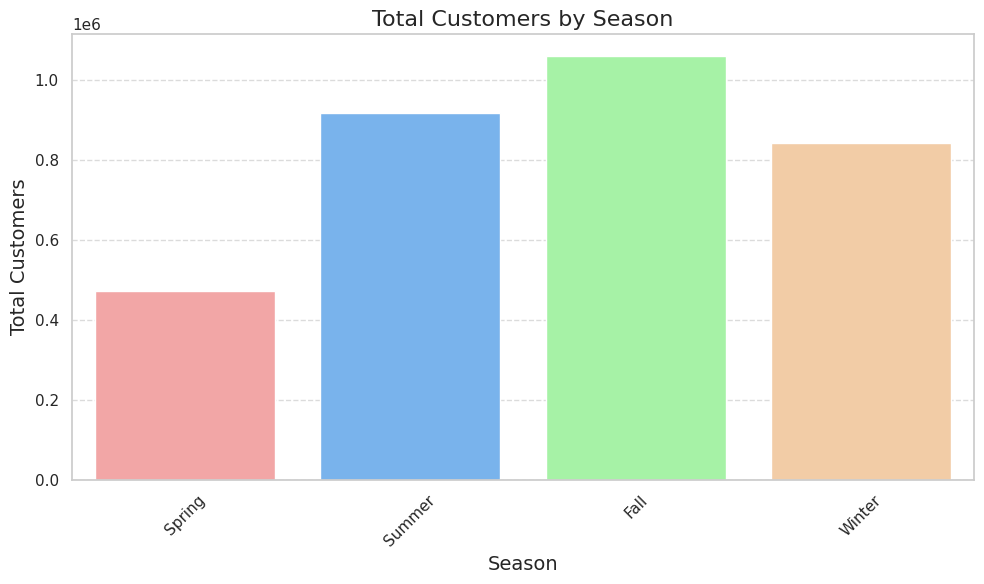

In [8]:
# Q2: Bagaimana Performa Jumlah Pelanggan Berdasarkan Musim?
byseason_df = day_df.groupby(by="season").agg({"cnt": "sum"}).reset_index()
byseason_df.rename(columns={
    "season": "season_name",
    "cnt": "total_customers",
}, inplace=True)
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
byseason_df['season_name'] = byseason_df['season_name'].replace(season_mapping)
# Visualisasi data menggunakan bar chart
# Visualisasi data menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='total_customers', data=byseason_df, palette=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title("Total Customers by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Total Customers", fontsize=14)
plt.xticks(rotation=45)  # Rotasi label season_name jika diperlukan
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid untuk membantu visualisasi
plt.tight_layout()  # Menyesuaikan layout
plt.show()

### Pertanyaan 3: Bagaimana Performa Jumlah Pelanggan Berdasarkan Jam?

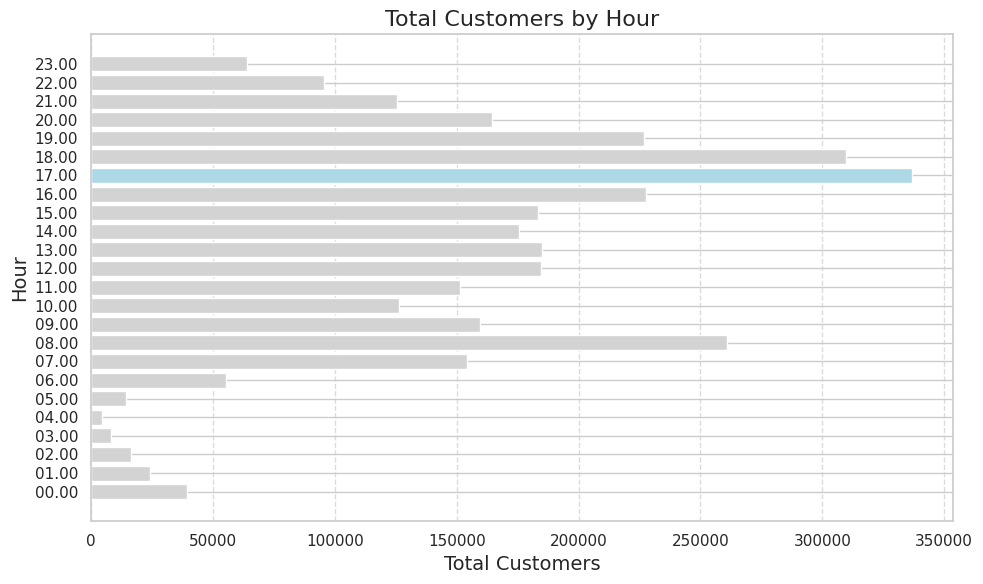

In [10]:
# Q3: Bagaimana Performa Jumlah Pelanggan Berdasarkan Jam?
byhour_df = hour_df.groupby(by="hr").agg({"cnt": "sum"}).reset_index()
byhour_df.rename(columns={
    "cnt": "total_customers",
}, inplace=True)
# Memformat kolom hr menjadi 'HH.MM'
byhour_df['hr'] = byhour_df['hr'].apply(lambda x: f"{x:02}.00")
# Mengatur warna berdasarkan jam, jam 17.00 disorot
colors = ['#ADD8E6' if hr == '17.00' else '#D3D3D3' for hr in byhour_df['hr']]  # #ADD8E6 untuk biru, #D3D3D3 untuk lightgrey
# Visualisasi data menggunakan horizontal bar chart dengan jam 17 tersorot
plt.figure(figsize=(10, 6))
plt.barh(byhour_df['hr'], byhour_df['total_customers'], color=colors)
plt.title("Total Customers by Hour", fontsize=16)
plt.xlabel("Total Customers", fontsize=14)
plt.ylabel("Hour", fontsize=14)
plt.yticks(byhour_df['hr'])  # Mengatur ticks untuk menampilkan semua jam
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Tambahkan grid untuk membantu visualisasi
plt.tight_layout()
plt.show()

**Insight:**
- Pada pertanyaan 1 menggunakan line chart untuk menunjukkan perkembangan jumlah pelanggan.
- Pada pertanyaan 2 menggunakan bar chart untuk menunjukkan perbandingan jumlah pelanggan, mencoba menggunakan library seaborn untuk melihat apa perbedaannya, ternyata menghasilkan output yang sama dengan plt. Saya juga membuat agar seasonnya lebih mudah dibaca dibandingkan dengan nomor 1 2 3 4, saya menggunakan mapping untuk tiap nama seasonnya
- Pada pertanyaan 3 menggunakan bar chart untuk melihat perbandingan jumlah pelanggan tiap jamnya. Saya mengubah format jamnya dari 0 1 2 3 4 menjadi 00.00 01.00 sehingga mudah dipahami. Warna pada jam 17.00 disorot agar terlihat bahwa pada jam 17.00 merupakan jam dimana paling banyak pelanggan.

## Analisis Lanjutan: Binning Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34984\3959273722.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = hour_df.groupby('time_bin')['cnt'].sum().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34984\3959273722.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_bin', y='cnt', data=binned_data, palette='viridis')


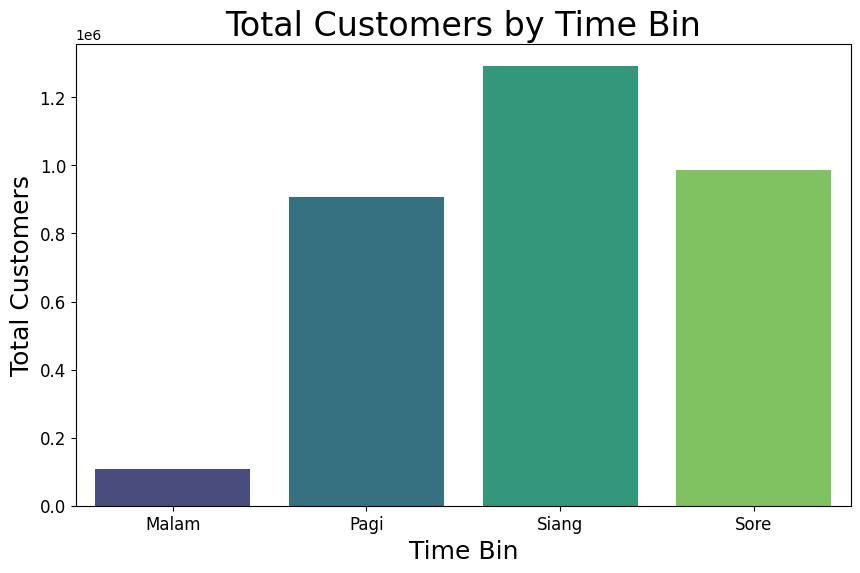

In [20]:
# Binning berdasarkan jam
# Menentukan batas bin (jam)
bins = [0, 6, 12, 18, 24]  # Batas untuk pagi, siang, sore, dan malam
labels = ['Malam', 'Pagi', 'Siang', 'Sore']  # Label untuk masing-masing bin

# Menambahkan kolom bin ke hour_df
hour_df['time_bin'] = pd.cut(hour_df['hr'], bins=bins, labels=labels, right=False)

# Menghitung total pelanggan per bin
binned_data = hour_df.groupby('time_bin')['cnt'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='time_bin', y='cnt', data=binned_data, palette='viridis')

plt.title("Total Customers by Time Bin", fontsize=24)
plt.xlabel("Time Bin", fontsize=18)
plt.ylabel("Total Customers", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Prediksi-prediksi

Prediksi:
- Jumlah pelanggan yang menggunakan sepeda akan meningkat secara signifikan selama musim panas. Dengan suhu yang lebih hangat dan cuaca yang lebih baik, lebih banyak orang cenderung menggunakan sepeda untuk aktivitas rekreasi dan komuter.
- Jumlah pelanggan kemungkinan akan menurun selama musim dingin. Kondisi cuaca yang tidak mendukung dan suhu yang rendah dapat mengurangi minat orang untuk bersepeda, terutama di daerah dengan salju atau hujan es.
- Penggunaan sepeda akan mencapai puncaknya pada jam-jam tertentu, seperti pagi hari (jam 7-9) dan sore hari (jam 5-7) ketika orang berangkat dan pulang kerja. Pada malam hari, penggunaan mungkin menurun seiring dengan berkurangnya visibilitas dan aktivitas luar ruangan.

## Conclusion

- Secara keseluruhan, performa pelanggan menunjukkan tren positif dari tahun ke tahun. Ini mengindikasikan bahwa perusahaan berhasil menarik lebih banyak pelanggan dan mempertahankan mereka sepanjang tahun.
- Dari data ini, dapat disimpulkan bahwa musim Fall merupakan periode puncak bagi jumlah pelanggan, sedangkan Spring menunjukkan performa pelanggan yang paling rendah. Hal ini menunjukkan adanya tren musiman yang signifikan dalam perilaku pelanggan, di mana lebih banyak pelanggan cenderung menggunakan layanan atau produk selama musim Fall dan Summer.
- Secara keseluruhan, jam 17.00 hingga 19.00 merupakan periode tersibuk, mencerminkan kecenderungan pelanggan untuk menggunakan layanan pada sore hingga malam hari. Sebaliknya, jam-jam dini seperti 03.00 dan 04.00 menunjukkan angka pelanggan yang sangat rendah, dengan masing-masing mencatat hanya 8.174 dan 4.428 pelanggan.